### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

### 1. Read in the `coupons.csv` file.




In [113]:
url = 'https://raw.githubusercontent.com/Liatgenosar/Coupon-Acceptance-Analysis---PA_5/main/coupons.csv'
data = pd.read_csv(url)

In [114]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. Investigate the dataset for missing or problematic data.

In [115]:
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
8159,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Female,46,Unmarried partner,...,less1,less1,1~3,less1,1,1,0,1,0,1
6699,Home,Alone,Sunny,55,6PM,Restaurant(<20),1d,Male,21,Single,...,gt8,less1,1~3,never,1,1,0,0,1,1
5433,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,NaN,1~3,1~3,less1,1,0,0,1,0,1
8316,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,26,Married partner,...,1~3,1~3,4~8,4~8,1,1,1,0,1,0


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

This dataset has 12,684 entries, and 25 feature columns. The target column is Y : will the customer accept the coupon. Y = 1 : the customer accepted the cupon. Y = 0 : the customer did not accept the coupon. 

In [117]:
data.shape

(12684, 26)

In [118]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [119]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Looking at the numeric columns:**  Y, the target column, has 2 values: 1 and 0. From inspecting the numeric feature columns values distribution, **I do not see any outliers.**

In [120]:
data.describe(include = 'object')

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


**From looking at the categorical features:** All the categorical columns have low cardinality - number of unique values per each is small, which is good when the dataset does into a model. Exception for number of unique values is the occupation attribute, which has 25 unique values, though this number is quite reasonable and can be dealt with.

## 3. Decide what to do about your missing data -- drop, replace, other...

There are missing values in the dataset. Almost all of the car column values are missing: 12,576 out of 12,684. It does not enable filling the missing values based on most frequent values. Therefore it will be dropped. Other columns such as Bar, CoffeeHouse and CarryAway have small number of missing values: less than 200. Those entries with missing values will be dropped. This is a very small number of missing values compared to the size of the dataset.

Also I will check for duplicated, and drop it if necessary.

In [121]:
data = data.drop(['car'], axis = 1)
data.shape

(12684, 25)

In [122]:
data.dropna(inplace=True)
data.shape

(12079, 25)

About 600 lines were dropped while dropna

In [123]:
data.duplicated().sum()

72

In [124]:
# Drop this small number of duplicated entries

data.drop_duplicates(inplace = True)

In [125]:
data.shape

(12007, 25)

## 4. What proportion of the total observations chose to accept the coupon? 



<AxesSubplot:title={'center':'Total customers that accept (1) and do not accept (0) the coupon'}, ylabel='Y'>

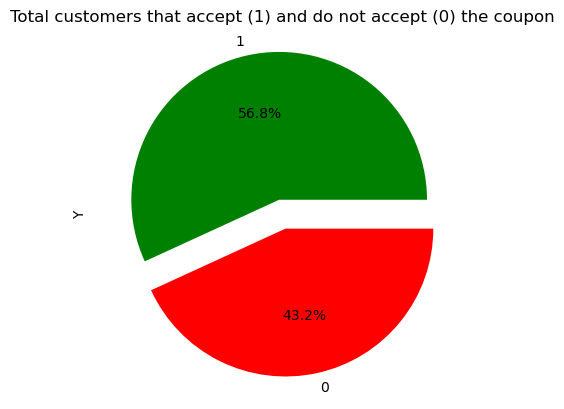

In [15]:
data['Y'].value_counts().plot(kind = 'pie', explode = [0.1,0.1], 
                                     autopct="%0.1f%%", colors = ['g','r'], 
                              title='Total customers that accept (1) and do not accept (0) the coupon')

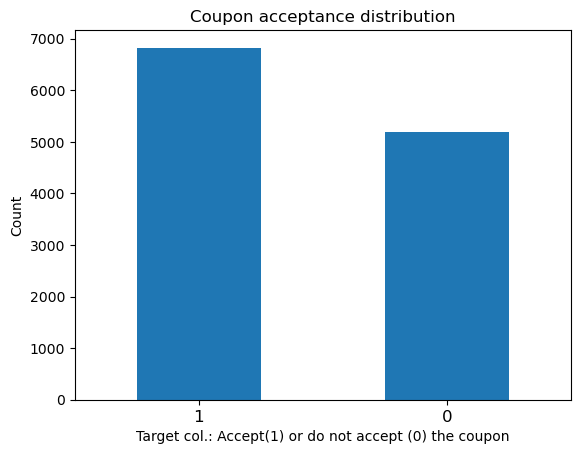

In [18]:
# A Bar Plot of the target column:

data['Y'].value_counts().plot(kind='bar')
plt.xlabel('Target col.: Accept(1) or do not accept (0) the coupon')
plt.ylabel('Count')
plt.title('Coupon acceptance distribution')
plt.xticks(rotation=0, fontsize=12);
plt.show()

## 5. Use a bar plot to visualize the `coupon` column.

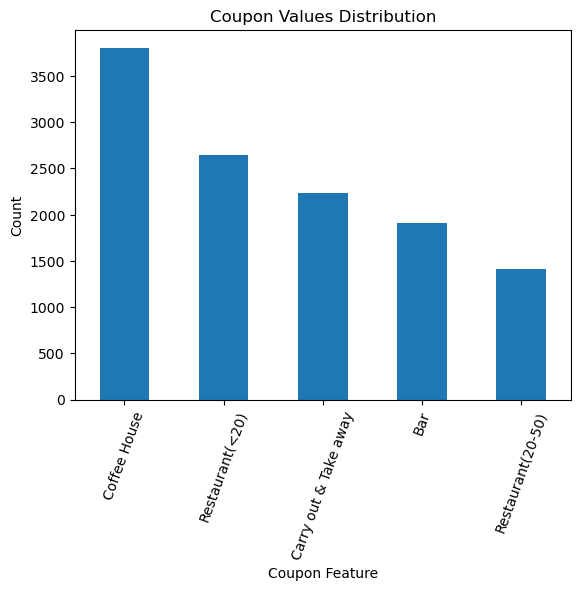

In [24]:
data['coupon'].value_counts().plot(kind='bar')
plt.xlabel('Coupon Feature')
plt.ylabel('Count')
plt.title('Coupon Values Distribution')
plt.xticks(rotation=70, fontsize=10);
plt.show()

## 6. Use a histogram to visualize the temperature column.

In [25]:
data.temperature.describe()

count    12007.000000
mean        63.301408
std         19.131641
min         30.000000
25%         55.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: temperature, dtype: float64

Text(0.5, 1.0, 'Histogram of the Temperature Column')

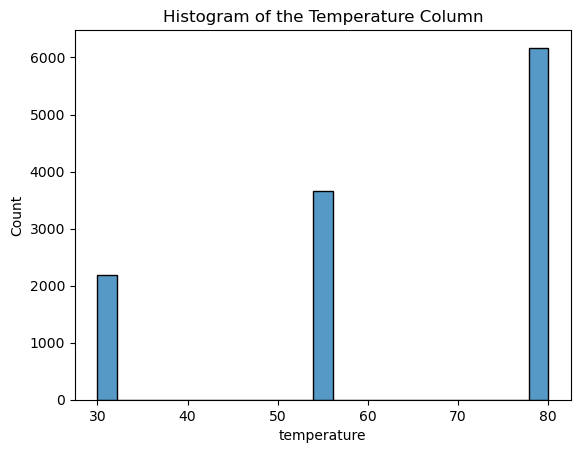

In [27]:
sns.histplot(data=data, x="temperature")
plt.title('Histogram of the Temperature Column')

The temperature, though it has numeric values, looks like a categorical column. The values can be represented by ordinal encoding because the values are ordered.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
data.coupon.value_counts()

Coffee House             3809
Restaurant(<20)          2646
Carry out & Take away    2233
Bar                      1906
Restaurant(20-50)        1413
Name: coupon, dtype: int64

In [33]:
data_bar = data.loc[data['coupon'] == 'Bar']
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [34]:
data_bar.shape

(1906, 25)

From the dataframe's shape info I could know ahead to expect 1906 entries for 'Bar'

2. What proportion of bar coupons were accepted?


In [35]:
data_bar['Y'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

,Y
0,58.81%
1,41.19%


One can see there is a drop in acceptance of coupons for Bar in relation for the whole dataset: the coupon acceptance rate (Y) for the general dataset was 56.8%.

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [40]:
data_bar.Bar.value_counts()

never    788
less1    546
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1~3'),
  Text(1, 0, '4~8'),
  Text(2, 0, 'gt8'),
  Text(3, 0, 'less1'),
  Text(4, 0, 'never')])

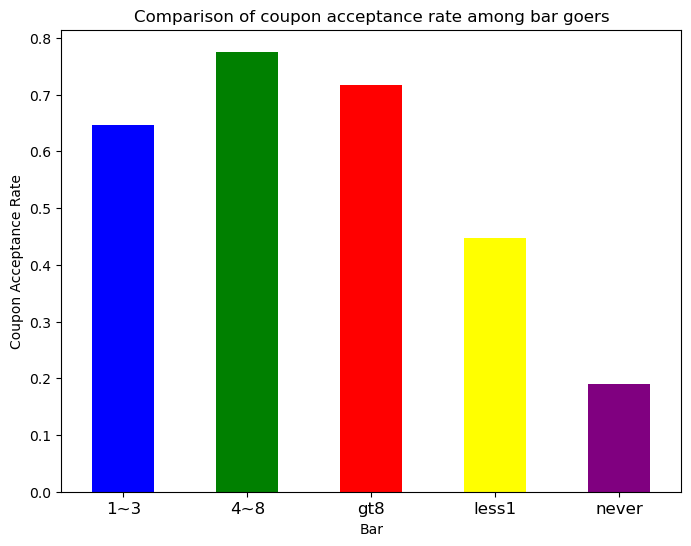

In [45]:
colors = ['blue','green','red','yellow','purple']
data_bar.groupby('Bar')['Y'].mean().plot(kind='bar',title='Comparison of coupon acceptance rate among bar goers', 
                                           color=colors, figsize=(8, 6));
plt.ylabel("Coupon Acceptance Rate")
plt.xticks(rotation=0, fontsize=12)

We can see that the groups with top three coupon acceptance are people going 4-8 times, more than 8 times, and 1-3 times to the bar.

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
data_bar.age.value_counts()

21         397
26         368
31         321
50plus     273
36         196
41         171
46          99
below21     81
Name: age, dtype: int64

In [54]:
age_bar_cross = data_bar.groupby(['age', 'Bar']).agg({'Y': 'mean'})
#result = result.groupby(level=0).apply(lambda x: x / float(x.mean()))
print(age_bar_cross)

                      Y
age     Bar            
21      1~3    0.650485
        4~8    0.750000
        gt8    0.833333
        less1  0.586538
        never  0.216418
26      1~3    0.707865
        4~8    0.846154
        gt8    0.833333
        less1  0.448718
        never  0.167939
31      1~3    0.647059
        4~8    0.875000
        gt8    0.333333
        less1  0.330275
        never  0.201681
36      1~3    0.500000
        4~8    0.500000
        less1  0.328767
        never  0.192771
41      1~3    0.642857
        4~8    0.750000
        less1  0.522727
        never  0.156863
46      1~3    0.666667
        4~8    0.857143
        less1  0.500000
        never  0.181818
50plus  1~3    0.645833
        4~8    0.666667
        gt8    1.000000
        less1  0.407407
        never  0.102564
below21 1~3    0.333333
        gt8    0.500000
        less1  0.500000
        never  0.406780


<AxesSubplot:xlabel='age,Bar'>

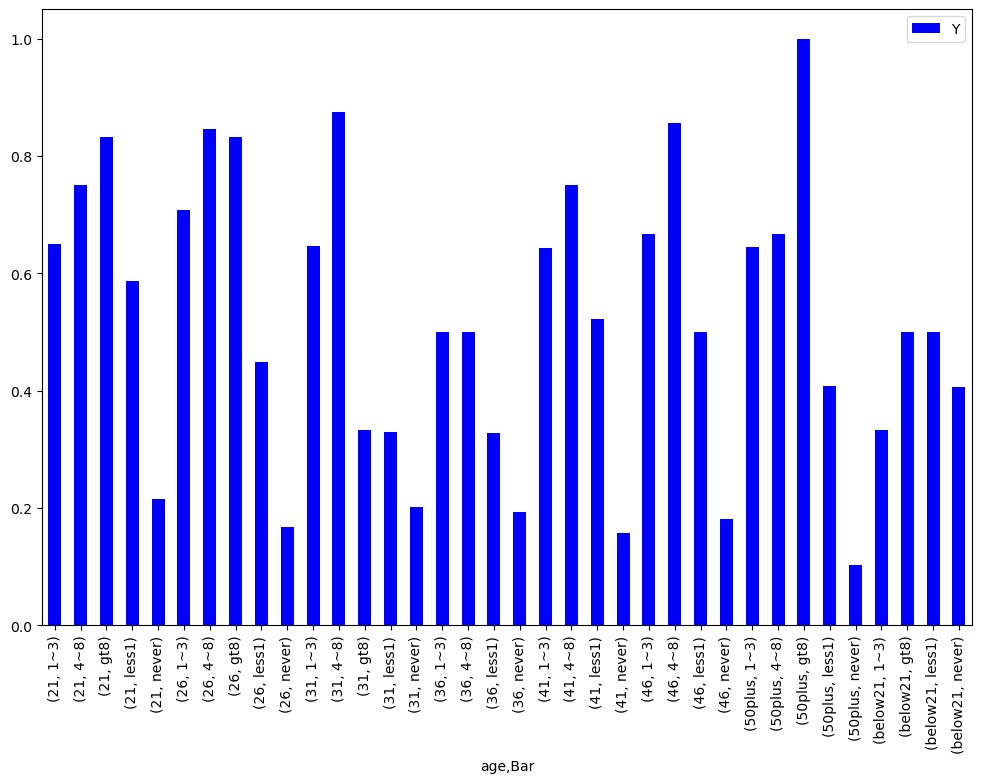

In [58]:
colors = ['blue','green','orange','yellow','purple']
age_bar_cross.plot(kind='bar', color = colors, figsize=(12, 8))

As we go with the age groups over the age of 25, there's an increase of coupon acceptance amonf drivers, especially those bar goers of 4-8 and more than 8 times. The increase in accpetance rate starts to fall in the bellow 21 group, which makes sense - that's usually not a legal age to drink.

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [61]:
data_bar.passanger.value_counts()

Alone        1139
Friend(s)     316
Partner       259
Kid(s)        192
Name: passanger, dtype: int64

Most of bar goers are driving alone

In [62]:
data_bar.occupation.value_counts()

Unemployed                                   292
Student                                      237
Computer & Mathematical                      222
Sales & Related                              175
Education&Training&Library                   125
Management                                   104
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Physical Social

Out of 1906 bar goers, only 9 have the occupation of Farming Fishing & Forestry. So it really does not matter so much.

In [64]:
filtered_df = data_bar[(data_bar['Bar'] != 'less1')&(data_bar['Bar'] != 'never') & (data_bar['passanger'] != 'Kid(s)') 
                       & (~data_bar['occupation'].isin(['Farming Fishing & Forestry']))]

In [66]:
# Total acceptance rate of coupons in the filtered dataset. Over 21, and passengers are not kids:
acceptance_rate = filtered_df['Y'].mean()
acceptance_rate

0.7094339622641509

(array([0, 1, 2]), [Text(0, 0, '1~3'), Text(1, 0, '4~8'), Text(2, 0, 'gt8')])

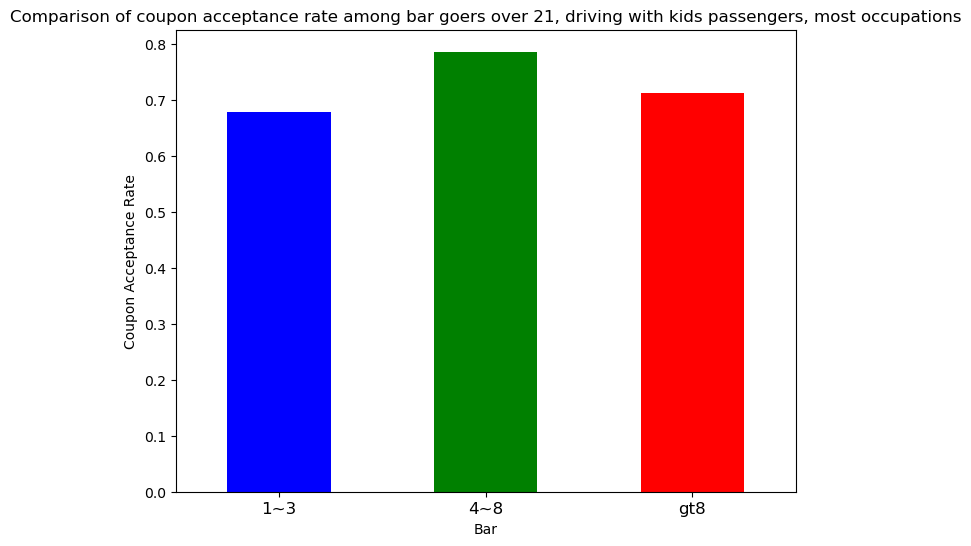

In [70]:
colors = ['blue','green','red','yellow','purple']
filtered_df.groupby('Bar')['Y'].mean().plot(kind='bar',
                                            title='Comparison of coupon acceptance rate among bar goers over 21, driving with kids passengers, most occupations', 
                                           color=colors, figsize=(8, 6));
plt.ylabel("Coupon Acceptance Rate")
plt.xticks(rotation=0, fontsize=12)

### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [71]:
# Let's look at marital status in the deneral df data:

data.maritalStatus.value_counts()

Married partner      4799
Single               4554
Unmarried partner    2047
Divorced              499
Widowed               108
Name: maritalStatus, dtype: int64

Small fraction are widowed.

In [73]:
# Acceptance rate of: go to bars more than once a month, had passengers that were not a kid, and were not widowed:

filtered_df2 = data_bar[(data_bar['Bar'] != 'less1')&(data_bar['Bar'] != 'never') & (data_bar['passanger'] != 'Kid(s)') 
                       & (data_bar['maritalStatus']!= 'Widowed')]

In [91]:
acceptance_rate2 = filtered_df2['Y'].mean()
print('Acceptance rate of: go to bars more than once a month, had passengers that were not a kid, and were not widowed: {:.2f}'.
      format(acceptance_rate2))

Acceptance rate of: go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.71


In [76]:
# Acceptance rate of: go to bars more than once a month and are under the age of 30

In [77]:
filtered_df3 = data_bar[(data_bar['Bar'] != 'less1')&(data_bar['Bar'] != 'never') 
                       & (data_bar['age'].isin(['below21','21','26']))]

In [89]:
acceptance_rate3 = filtered_df3['Y'].mean()
print('Acceptance rate of: go to bars more than once a month and are under the age of 30: {:.2f}'.format
     (acceptance_rate3))

Acceptance rate of: go to bars more than once a month and are under the age of 30: 0.72


Acceptance rate is a little higher in those younger people age group, under 31. Still, those acceptance rates of 0.71 and 0.72% are higher than the general acceptance rate for the whole dataset of 56.8!

In [81]:
# Acceptance rate of: go to cheap restaurants more than 4 times a month and income is less than 50K.
# Work with the general dataset on this.

In [82]:
data.RestaurantLessThan20.value_counts()

1~3      5143
4~8      3424
less1    1983
gt8      1282
never     175
Name: RestaurantLessThan20, dtype: int64

In [83]:
data.income.value_counts()

$25000 - $37499     1912
$12500 - $24999     1722
$37500 - $49999     1680
$100000 or More     1673
$50000 - $62499     1561
Less than $12500    1006
$62500 - $74999      837
$75000 - $87499      813
$87500 - $99999      803
Name: income, dtype: int64

In [84]:
filtered_df4 = data[ (data['RestaurantLessThan20'].isin(['4~8','gt8']))
                    &(data['income'].isin(['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500'])) ]

In [87]:
acceptance_rate4 = filtered_df4['Y'].mean()
print('Acceptance rate of: go to cheap restaurants more than 4 times a month and income is less than 50K: {:.2f}'.format
     (acceptance_rate4))

Acceptance rate of: go to cheap restaurants more than 4 times a month and income is less than 50K: 0.60


Low income drivers and frequently go to cheap restaurant: their acceptance rate of the coupon is slightle higher than the general acceptance rate.

### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Bar goers of more than one time have a high coupon acceptance rate - higher than the general rate. Especially bar goers of 4-8 time per month and of more than 8, from all age groups, except for under 21, are very much likely to accept the coupon. For those the acceptance rate can reach 80%! This is a great group to taget marketing coupon for.
- Other good population groups to target a coupon campaign are: 1) bars goers more than once a month, passengers not a kid, and were not widowed. 2) bar goers more than once a month and are under the age of 30. Those 2 goups are at 71% and 72%, respectively, acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Coupon acceptance rate among age groups:**

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '21'),
  Text(1, 0, '26'),
  Text(2, 0, '31'),
  Text(3, 0, '36'),
  Text(4, 0, '41'),
  Text(5, 0, '46'),
  Text(6, 0, '50plus'),
  Text(7, 0, 'below21')])

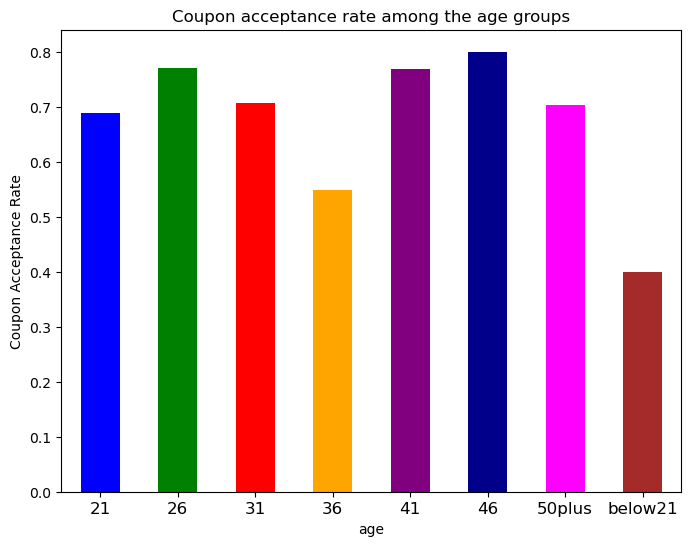

In [95]:
colors = ['blue','green','red','orange','purple','darkblue','magenta','brown']
filtered_df.groupby('age')['Y'].mean().plot(kind='bar',
                                            title='Coupon acceptance rate among the age groups', 
                                           color=colors, figsize=(8, 6));
plt.ylabel("Coupon Acceptance Rate")
plt.xticks(rotation=0, fontsize=12)

Highest acceptance rate among 26+ year old, and the 41 and up age groups. All above the overall accaeptance rate (od 56.8%). Those age groups averages abouve 70% acceptance rate, with the 46 yo reaching almost 80%. Young people bellow 21, are a little bellow 40% acceptance rate. In term of marketing coupons to this age group,their interests  and preference should be research, to target them with better appealing coupons.

In [105]:
# Let's examine Marital Status population percentage, and how acceptance rate changes among marital status groups:

data.maritalStatus.value_counts(normalize= True).to_frame().style.format('{:.2%}')

,maritalStatus
Married partner,39.97%
Single,37.93%
Unmarried partner,17.05%
Divorced,4.16%
Widowed,0.90%


Majority of the dataset's population are either single or married. See bellow that the acceptance rate is the highest acceptance rate are among the divorced group - over 80% acceptance rate.

In [108]:
pd.crosstab(data['maritalStatus'],data['age'], normalize='index').round(2).style.format('{:.2%}')

age,21,26,31,36,41,46,50plus,below21
maritalStatus,,,,,,,,
Divorced,0.00%,0.00%,13.00%,22.00%,26.00%,4.00%,35.00%,0.00%
Married partner,9.00%,15.00%,22.00%,14.00%,15.00%,7.00%,18.00%,0.00%
Single,31.00%,26.00%,12.00%,5.00%,5.00%,5.00%,9.00%,7.00%
Unmarried partner,32.00%,23.00%,13.00%,11.00%,1.00%,3.00%,8.00%,9.00%
Widowed,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Married partner'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Unmarried partner')])

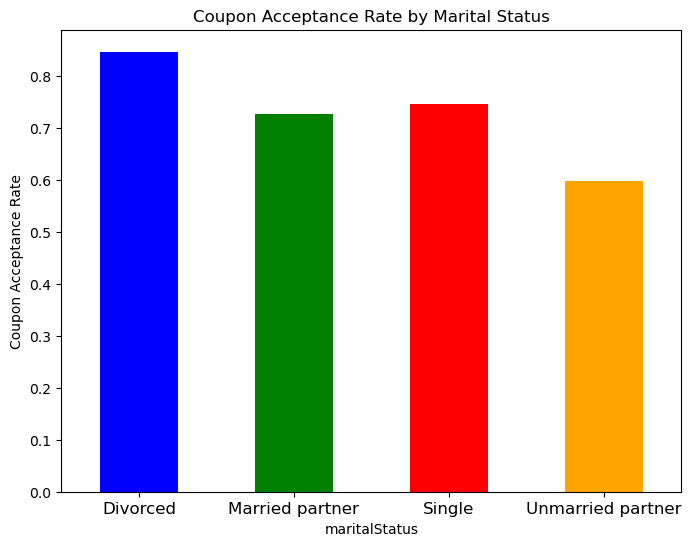

In [97]:
colors = ['blue','green','red','orange']
filtered_df.groupby('maritalStatus')['Y'].mean().plot(kind='bar',
                                            title='Coupon Acceptance Rate by Marital Status', 
                                           color=colors, figsize=(8, 6));
plt.ylabel("Coupon Acceptance Rate")
plt.xticks(rotation=0, fontsize=12)

In [98]:
data.CoffeeHouse.value_counts()

less1    3276
1~3      3133
never    2836
4~8      1655
gt8      1107
Name: CoffeeHouse, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1~3'),
  Text(1, 0, '4~8'),
  Text(2, 0, 'gt8'),
  Text(3, 0, 'less1'),
  Text(4, 0, 'never')])

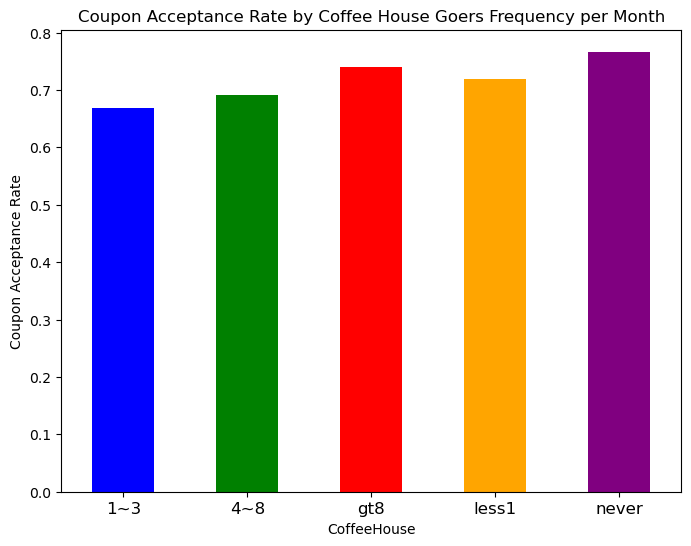

In [100]:
colors = ['blue','green','red','orange','purple']
filtered_df.groupby('CoffeeHouse')['Y'].mean().plot(kind='bar',
                                            title='Coupon Acceptance Rate by Coffee House Goers Frequency per Month', 
                                           color=colors, figsize=(8, 6));
plt.ylabel("Coupon Acceptance Rate")
plt.xticks(rotation=0, fontsize=12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Architecture & Engineering'),
  Text(1, 0, 'Arts Design Entertainment Sports & Media'),
  Text(2, 0, 'Building & Grounds Cleaning & Maintenance'),
  Text(3, 0, 'Business & Financial'),
  Text(4, 0, 'Community & Social Services'),
  Text(5, 0, 'Computer & Mathematical'),
  Text(6, 0, 'Construction & Extraction'),
  Text(7, 0, 'Education&Training&Library'),
  Text(8, 0, 'Food Preparation & Serving Related'),
  Text(9, 0, 'Healthcare Practitioners & Technical'),
  Text(10, 0, 'Healthcare Support'),
  Text(11, 0, 'Installation Maintenance & Repair'),
  Text(12, 0, 'Legal'),
  Text(13, 0, 'Life Physical Social Science'),
  Text(14, 0, 'Management'),
  Text(15, 0, 'Office & Administrative Support'),
  Text(16, 0, 'Personal Care & Service'),
  Text(17, 0, 'Production Occupations'),
  Text(18, 0, 'Protective Service'),
  Text(19, 0, 'Retired'),
  Text(20, 0, 'Sales & 

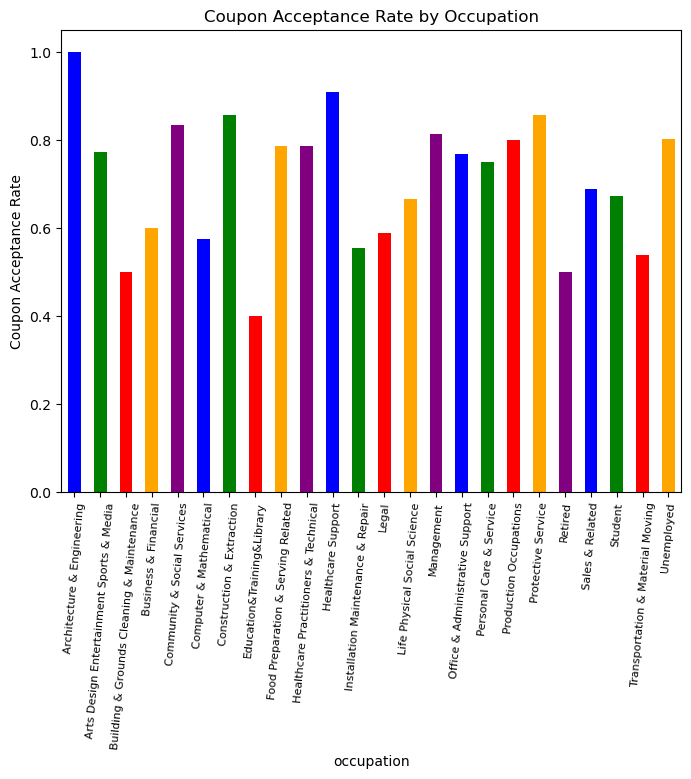

In [104]:
filtered_df.groupby('occupation')['Y'].mean().plot(kind='bar',
                                            title='Coupon Acceptance Rate by Occupation', 
                                           color=colors, figsize=(8, 6));
plt.ylabel("Coupon Acceptance Rate")
plt.xticks(rotation=85, fontsize=8)

Top occupations for highest acceptance rates: Architecture & Engineering (100%!, Healthcare practitioners technical (90%), Protective Service (85%).